In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dt = pd.read_csv('/content/drive/MyDrive/datasets/test.csv')
dt

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


Q1

In [6]:
smo_bw = dt[['Maternal Smoker','Birth Weight']]
smo_bw

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4586503a30>,
      dtype=object)

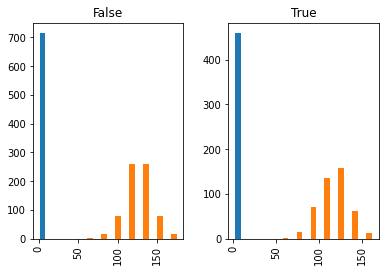

In [7]:
smo_bw.hist(by = "Maternal Smoker")

In [8]:
smoker = smo_bw['Birth Weight'] [smo_bw['Maternal Smoker'] == True]
smoker

2       128
3       108
8       143
10      144
11      141
       ... 
1162    143
1163    113
1164    109
1165    103
1171    130
Name: Birth Weight, Length: 459, dtype: int64

In [9]:
non_smoker = smo_bw['Birth Weight'] [smo_bw['Maternal Smoker'] == False]
non_smoker

0       120
1       113
4       136
5       138
6       132
       ... 
1168    132
1169    113
1170    128
1172    125
1173    117
Name: Birth Weight, Length: 715, dtype: int64

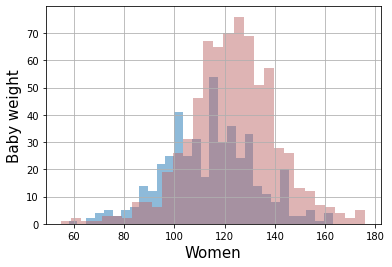

In [14]:
import seaborn as sns
smoker.hist(histtype='stepfilled', alpha=.5, bins=30)
non_smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=30)
plt.xlabel('Women',fontsize=15)
plt.ylabel('Baby weight',fontsize=15)
plt.show()

As you can see that the red distribution is moved to the right, which implies that the weight of the babies of the non-smoker is less compared to that of smoking mothers.

Q2

We can use A/B testing

Q3

Null hypothesis (H0): There is no difference in the weight of the babies whether the parent is a maternal smoker or not.

Alternate hypothesis (H1): There is difference in the weights of the babies whose mother's have smoked compared to non-smoking mothers.

Q4

We can actually find the difference in the mean of the two groups, Which can help us determine which hypothesis to be rejected

In [15]:
meant = smo_bw.groupby('Maternal Smoker').mean()
meant

,Birth Weight
Maternal Smoker,
False,123.085315
True,113.819172


Q5

In [16]:
observed = smo_bw['Birth Weight'][1] - smo_bw['Birth Weight'][0]
observed

-7

Q6

In [17]:
samp = smo_bw.sample(1174,replace = False)
samp

,Maternal Smoker,Birth Weight
1096,True,117
739,False,136
295,False,149
438,False,136
48,True,108
...,...,...
958,True,78
749,True,117
795,False,128
367,True,99


In [18]:
shuff_w = samp['Birth Weight']
og_shuff = smo_bw.assign(shuffled_weight = shuff_w.values)
og_shuff

,Maternal Smoker,Birth Weight,shuffled_weight
0,False,120,117
1,False,113,136
2,True,128,149
3,True,108,136
4,False,136,108
...,...,...,...
1169,False,113,78
1170,False,128,117
1171,True,130,128
1172,False,125,99


In [19]:
allgrpmean = og_shuff.groupby('Maternal Smoker').mean()
allgrpmean

,Birth Weight,shuffled_weight
Maternal Smoker,,
False,123.085315,118.758042
True,113.819172,120.559913


In [21]:
diff = allgrpmean['shuffled_weight'][0]- allgrpmean['shuffled_weight'][1]
diff

-1.801870895988543

In [23]:
import array
differences = np.zeros(5000)

for i in np.arange(5000):
    smoking_and_birthweight = dt[['Maternal Smoker', 'Birth Weight']]
    shuffled = smoking_and_birthweight.sample(1174,replace = False)
    shuffled_weights = shuffled['Birth Weight']
    original_and_shuffled = smoking_and_birthweight.assign(shuffled_weights=shuffled_weights.values )
    all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
    difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
    differences[i] = difference

differences

array([ 1.44984993,  0.38025199,  0.40529275, ..., -2.02723769,
        0.61635053, -0.17422186])

In [24]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,1.449850
1,0.380252
2,0.405293
3,-1.215202
4,0.072608
...,...
4995,-0.903981
4996,0.365943
4997,-2.027238
4998,0.616351


Q7

Observed Difference: -1.801870895988543


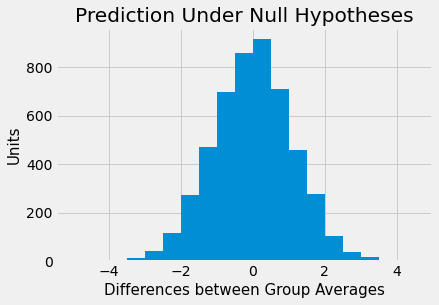

In [26]:
plt.style.use('fivethirtyeight')
differences_df.hist(bins = np.arange(-5,5,0.5))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
print('Observed Difference:', diff)

Q8

In [28]:
np.count_nonzero(differences <= diff)/differences.size

0.0506

The empirical p value is 0.0506

Q9

As the the observed difference after shuffling the dataset is -1.8018, which implies that the difference in the mean of the shuffled and observed is very minimal.